# Example 3: Housing Resilience of North-East San Francisco

Example 3 shows how **pyrecodes** can integrate with the [SimCenter's R2DTool](https://github.com/NHERI-SimCenter/R2DTool) and assess housing resilience of a community. 

Please refer to the **pyrecodes** [Example 3 page](https://nikolablagojevic.github.io/pyrecodes/html/usage/examples/example_3.html) for further details. 

![North-East San Francisco Case Study](./Example%203/Example_3_NorthEastSF.png)

In [2]:
from pyrecodes import main
system = main.run('./Example 3/NorthEast_SF_Housing_Main.json')

system.calculate_resilience()

Resilience assessment finished.
Re-CoDeS Resilience Calculator 
Scope: All
----------------------------- 
Total unmet demand: 
 Shelter: 1672327.0
 FirstResponderEngineer: 0.0
 RepairCrew: 75827.0
 Money: 0.0

NIST Resilience Goals Calculator: 
-------------------------------- 
 Resource: Shelter
 Scope: All
 DesiredFunctionalityLevel: 0.95
 MetAtTimeStep: 489




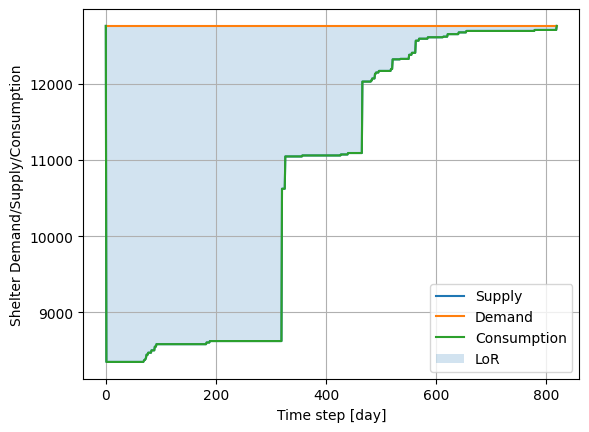

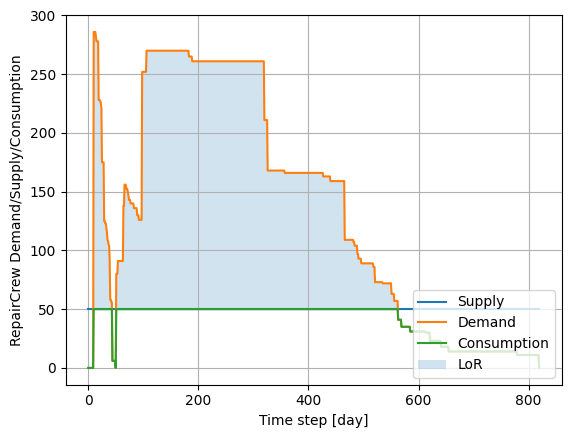

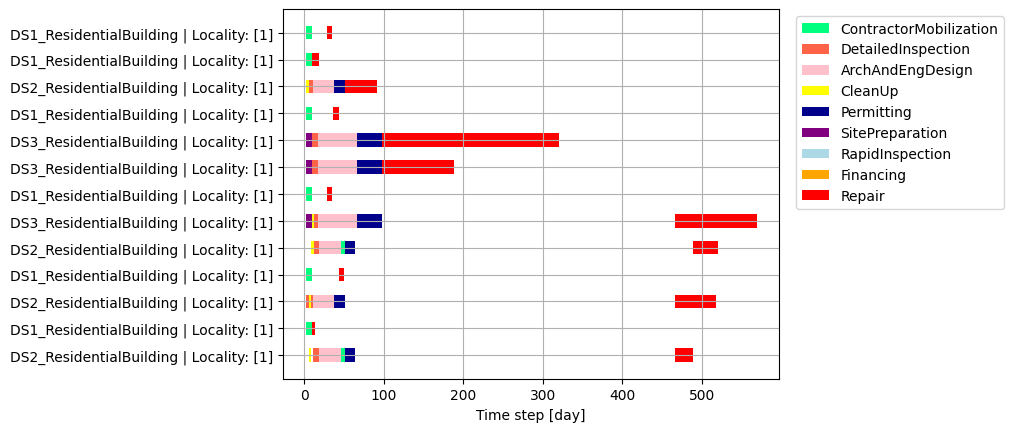

In [3]:
from pyrecodes import Plotter
plotter_object = Plotter.Plotter()
x_axis_label = 'Time step [day]'
resources_to_plot = ['Shelter', 'RepairCrew']
for resource_name in resources_to_plot:
    y_axis_label = f'{resource_name} Demand/Supply/Consumption'
    axis_object = plotter_object.setup_lor_plot_fig(x_axis_label, y_axis_label)
    # supply/demand/consumption information is in the ReCoDeS resilience calculator object, which is stored in the system object: system.resilience_calculators[0]
    plotter_object.plot_single_resource(list(range(system.START_TIME_STEP, system.time_step+1)), system.resilience_calculators[0].system_supply[resource_name], 
                                        system.resilience_calculators[0].system_demand[resource_name], 
                                        system.resilience_calculators[0].system_consumption[resource_name], axis_object)

# plot the gantt chart for the first 20 components
axis_object = plotter_object.setup_gantt_chart_fig(x_axis_label, system.components)
plotter_object.plot_gantt_chart(system.components[:20], axis_object)

In [4]:
from pyrecodes import GeoVisualizer as gvis

geo_visualizer = gvis.R2D_GeoVisualizer(system.components)
time_steps_to_plot = list(range(1, 5))

create_time_step_shapefiles = True
create_time_step_building_figures = True
create_recovery_gif = True

for time_step in time_steps_to_plot:
    if create_time_step_shapefiles:
        geo_visualizer.create_current_state_shapefile(time_step=time_step, file_name=f'./Example 3/TimeStep_{time_step}.shp')    
    if create_time_step_building_figures:
        geo_visualizer.create_current_state_buildings_and_supply_demand_figure(time_step, system, show=False, save=True, dpi=100)
    
if create_recovery_gif:
    # Note: To create a gif, you need to have the time_step figures already created.
    # They are created using the geo_visualisator.create_current_state_buildings_and_supply_demand_figure method with the save=True and show=False option.
    geo_visualizer.create_recovery_gif(time_steps_to_plot)

/Users/jinyanzhao/Desktop/SimCenterBuild/pyrecodes/pyrecodes/GeoVisualizer.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  self.buildings_geodataframe.to_file(f'{file_name}_Time_Step_{time_step}.shp', driver='ESRI Shapefile')
/Users/jinyanzhao/Desktop/SimCenterBuild/pyrecodes/pyrecodes/GeoVisualizer.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  self.buildings_geodataframe.to_file(f'{file_name}_Time_Step_{time_step}.shp', driver='ESRI Shapefile')
/Users/jinyanzhao/Desktop/SimCenterBuild/pyrecodes/pyrecodes/GeoVisualizer.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  self.buildings_geodataframe.to_file(f'{file_name}_Time_Step_{time_step}.shp', driver='ESRI Shapefile')
/Users/jinyanzhao/Desktop/SimCenterBuild/pyrecodes/pyrecodes/GeoVisualizer.py:115: UserWarning: Column names longer than 10 characters w